In [ ]:
path ='/content/drive/MyDrive/dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
train_path='/content/drive/MyDrive/dataset/train'
test_path='/content/drive/MyDrive/dataset/test'

In [5]:
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Discretization,Dropout

In [6]:
print('tensorflow : ',tf.__version__)
print('keras: ' ,keras.__version__)
print('cv2: ',cv2.__version__)

tensorflow :  2.17.0
keras:  3.6.0
cv2:  4.10.0


In [ ]:
#generators function for devide the dataset in to batches
train_db = keras.utils.image_dataset_from_directory(train_path,
                                                    labels='inferred',
                                                    label_mode='int',
                                                    image_size=(256,256)
                                                    )

test_db = keras.utils.image_dataset_from_directory(test_path,
                                                    labels='inferred',
                                                    label_mode='int',
                                                    image_size=(256,256)
                                                    )

Found 20047 files belonging to 2 classes.
Found 5010 files belonging to 2 classes.


In [ ]:
#Normalize for the pixw=el value between 0 and 1
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

trian_db =train_db.map(process)
test_db = test_db.map(process)

In [ ]:
#create a cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())#Improves Training Stability
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())#Improves Training Stability
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())#Improves Training Stability
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#show summery
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(trian_db,epochs=10,validation_data=test_db)

Epoch 1/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 9010s 14s/step - accuracy: 0.5860 - loss: 0.9597 - val_accuracy: 0.6381 - val_loss: 0.6413
Epoch 2/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.7259 - loss: 0.5396 - val_accuracy: 0.7766 - val_loss: 0.4735
Epoch 3/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.7988 - loss: 0.4349 - val_accuracy: 0.7537 - val_loss: 0.5043
Epoch 4/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 102s 163ms/step - accuracy: 0.8489 - loss: 0.3478 - val_accuracy: 0.7982 - val_loss: 0.4635
Epoch 5/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 145s 167ms/step - accuracy: 0.8913 - loss: 0.2576 - val_accuracy: 0.8126 - val_loss: 0.5152
Epoch 6/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 142s 168ms/step - accuracy: 0.9308 - loss: 0.1705 - val_accuracy: 0.7998 - val_loss: 0.6735
Epoch 7/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 104s 165ms/step - accuracy: 0.9551 - loss: 0.1199 - val_accuracy: 0.7964 - val_loss: 0.6064
Epoch 8/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.9717 - 

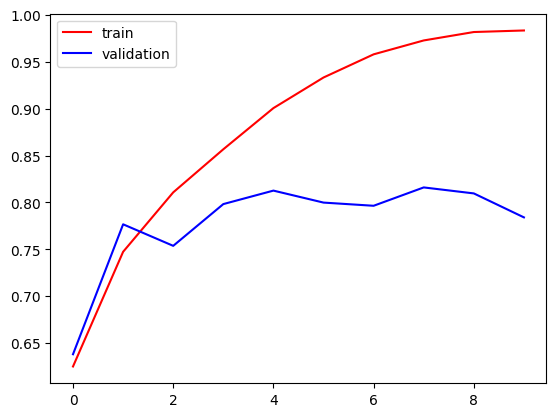

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

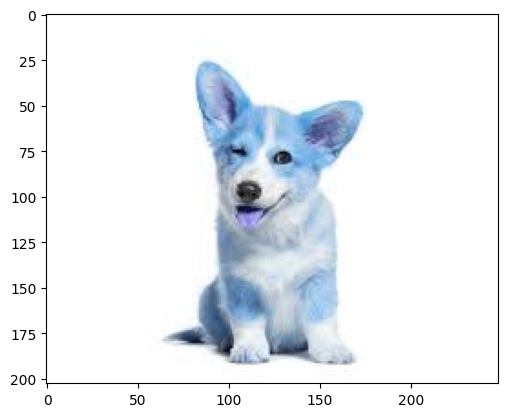

In [ ]:
import cv2
test_img =cv2.imread('/content/download.jpeg')
plt.imshow(test_img)


In [ ]:
test_img.shape

(203, 248, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input =test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


array([[0.]], dtype=float32)

In [ ]:
model.save('my_cnn_model.h5')